<a href="https://colab.research.google.com/github/technologyhamed/Neuralnetwork/blob/Single/FunctionApproximation/UsingTaylorPolynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
import pandas as pd
import matplotlib.animation as animation
plt.style.use('seaborn-poster')

# if using a Jupyter notebook, include:
%matplotlib inline

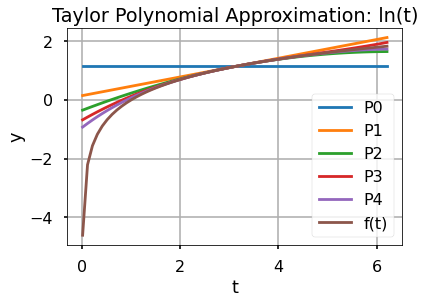

  symbolic_derivatives  ...                                        polynomials
0               log(a)  ...                                   1.14472988584940
1                  1/a  ...              0.318309886183791*t + 0.1447298858494
2              -1/a**2  ...  0.318309886183791*t - 0.5*(0.318309886183791*t...
3               2/a**3  ...  0.318309886183791*t + 0.333333333333333*(0.318...
4              -6/a**4  ...  0.318309886183791*t - 0.25*(0.318309886183791*...

[5 rows x 3 columns]


In [25]:

t, a = sp.symbols('t a')


def taylor_terms(func, order, point, derivatives=None):
    """
    find symbolic derivatives and Taylor terms
    func: symbolic function to approximate
    order: highest order derivative for Taylor polynomial (interger)
    point: point about which the function is approximated
    derivatives: list of symbolic derivatives
    """

    # initialize list of derivatives
    if derivatives is None:
        derivatives = [func.subs({t: a})]

    # check if highest order derivative is reached
    if len(derivatives) > order:
        # return list of taylor terms evaluated using substitution
        return derivatives, [derivatives[i].subs({a: point}) / math.factorial(i) * (t - point) ** i for i in range(len(derivatives))]

    # differentiate function with respect to t
    derivative = func.diff(t)
    # append to list of symbolic derivatives ** substitute t with a **
    derivatives.append(derivative.subs({t: a}))

    # recursive call to find next term in Taylor polynomial
    return taylor_terms(derivative, order, point, derivatives)


def taylor_polynomials(_terms):
    """
    find Taylor polynomials
    func: symbolic function to approximate
    order: highest order derivative for Taylor polynomial (interger)
    point: point about which the function is approximated
    derivatives: list of Taylor terms
    """

    # initialize list
    polynomials = []

    # initialize taylor polynomial
    _poly = None

    # loop through tayloer terms
    for term in range(len(_terms)):
        # build up polynomial on each iteration
        _poly = _terms[term] if _poly is None else _poly + _terms[term]

        # store current taylor polynomial
        polynomials.append(_poly)

    # return taylor polynomials
    return polynomials


if __name__ == '__main__':

    # analysis label
    label = 'ln(t)'

    # symbolic function to approximate
    f = sp.log(t)

    # point about which to approximate
    approximation_point = np.pi

    # definte time start and stop
    start = 0.01
    stop = 2 * sp.pi
    time = np.arange(start, stop, 0.1)

    # find taylor polynomial terms describing function f(t)
    symbolic_derivatives, terms = taylor_terms(func=f, order=4, point=approximation_point)
    polys = taylor_polynomials(terms)

    # initialize plot
    fig, ax = plt.subplots()
    ax.set(xlabel='t', ylabel='y', title=f'Taylor Polynomial Approximation: {label}')
    legend = []

    for p, poly in enumerate(polys):
        # plot current polynomial approximation
        ax.plot(time, [poly.subs({t: point}) for point in time])

        # append item to legend
        legend.append(f'P{p}')

    # plot actual function for comparison
    ax.plot(time, [f.subs({t: point}) for point in time])
    legend.append(f'f(t)')

    # create dataframe
    df = pd.DataFrame({'symbolic_derivatives': symbolic_derivatives,
                       'taylor_terms': terms,
                       'polynomials': polys
                       })

    # save and show results
    ax.legend(legend)
    ax.grid()
    plt.savefig(f'taylor_{label}.png')
    plt.show()
    
    df.to_csv(f'taylor_{label}.csv', encoding='utf-8')
    print(df.head(10))


0.7071068056832942


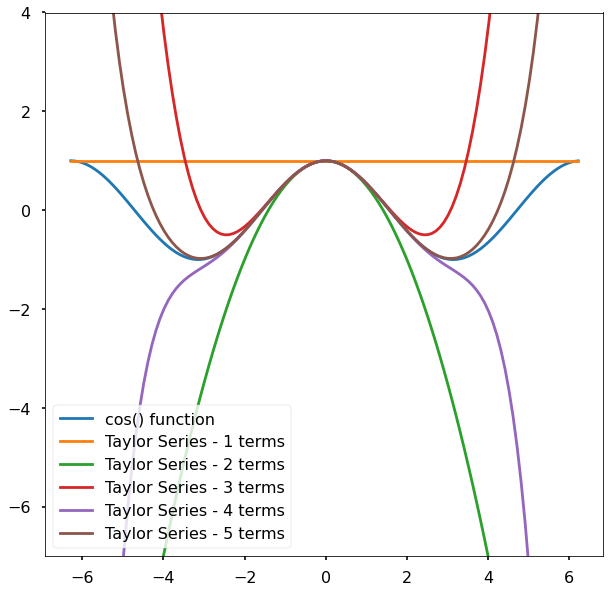

In [31]:
#new Approximation function
def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx
angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)


angle_rad = (math.radians(45))
out = func_cos(angle_rad,5)
print(out)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,10)
ax.plot(angles,p_cos)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    t_cos = [func_cos(angle,i) for angle in angles]
    ax.plot(angles,t_cos)

ax.set_ylim([-7,4])

# set up legend
legend_lst = ['cos() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()
